## Введение в анализ данных. ДЗ 2. Python.

ФИО: Копин Борис Александрович

In [15]:
%matplotlib inline

In [16]:
import math

import pandas as pd
import numpy as np

import matplotlib
from matplotlib.pylab import plt


matplotlib.style.use('ggplot')

Список вакансии с “The Official Website of the City of New York” https://data.cityofnewyork.us/Business/NYC-Jobs/kpav-sd4t

Посчитать распределение имеющихся вакансий по зарплате (считать, что если для вакансии указан диапазон зарплат, реальная зарплата будет равна среднему минимальной и максимальной границ). Нанести на карту информацию с имеющихся предложениях о работе с цветовой маркировкой размера предлагаемой заработной платы. 

example - http://nbviewer.ipython.org/github/lmart999/GIS/blob/master/SF_GIS_Crime.ipynb

In [17]:
# https://data.cityofnewyork.us/api/views/kpav-sd4t/rows.csv?accessType=DOWNLOAD
na_values = ['NO CLUE', 'N/A', '0', ' ']
data = pd.read_csv('./NYC_Jobs.csv', na_values=na_values)

In [18]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print len(data)
data.head()


3429


,job_id,agency,posting_type,#_of_positions,business_title,civil_service_title,title_code_no,level,salary_range_from,salary_range_to,...,additional_information,to_apply,hours/shift,work_location_1,recruitment_contact,residency_requirement,posting_date,post_until,posting_updated,process_date
0,132719,DEPT OF ENVIRONMENT PROTECTION,External,2,Stationary Engineer (Electric),STATIONARY ENGINEER (ELECTRIC),91645,00,94983,94983,...,Appointments are subject to OMB approval For ...,Click the ''Apply Now'' button,NaN,"3701 Jerome Ave, Bx NY 10467",NaN,New York City residency is generally required ...,10/08/2013 00:00:00,NaN,10/08/2013 00:00:00,10/27/2015 00:00:00
1,132719,DEPT OF ENVIRONMENT PROTECTION,Internal,2,Stationary Engineer (Electric),STATIONARY ENGINEER (ELECTRIC),91645,00,94983,94983,...,Appointments are subject to OMB approval For ...,Click the ''Apply Now'' button,NaN,"3701 Jerome Ave, Bx NY 10467",NaN,New York City residency is generally required ...,10/08/2013 00:00:00,NaN,10/08/2013 00:00:00,10/27/2015 00:00:00
2,132786,DEPT OF ENVIRONMENT PROTECTION,External,1,"Director, Strategic Sourcing",ADMINISTRATIVE PROJECT MANAGER,83008,M2,54740,146276,...,NaN,Click the ''APPLY NOW'' button.,35 Hours per Week/Day,"59-17 Junction Blouvard, Flushing NY",NaN,New York City Residency is not required for th...,10/08/2013 00:00:00,NaN,11/08/2013 00:00:00,10/27/2015 00:00:00
3,132786,DEPT OF ENVIRONMENT PROTECTION,Internal,1,"Director, Strategic Sourcing",ADMINISTRATIVE PROJECT MANAGER,83008,M2,54740,146276,...,NaN,Click the ''APPLY NOW'' button.,35 Hours per Week/Day,"59-17 Junction Blouvard, Flushing NY",NaN,New York City Residency is not required for th...,10/08/2013 00:00:00,NaN,11/08/2013 00:00:00,10/27/2015 00:00:00
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,00,35,35,...,SPECIAL NOTE: 1. This is a temporary assig...,Click the ''Apply Now'' button.,NaN,NaN,NaN,NYCHA has no residency requirement.,01/09/2014 00:00:00,NaN,01/08/2014 00:00:00,10/27/2015 00:00:00


In [19]:
data.columns

Index([u'job_id', u'agency', u'posting_type', u'#_of_positions',
       u'business_title', u'civil_service_title', u'title_code_no', u'level',
       u'salary_range_from', u'salary_range_to', u'salary_frequency',
       u'work_location', u'division/work_unit', u'job_description',
       u'minimum_qual_requirements', u'preferred_skills',
       u'additional_information', u'to_apply', u'hours/shift',
       u'work_location_1', u'recruitment_contact', u'residency_requirement',
       u'posting_date', u'post_until', u'posting_updated', u'process_date'],
      dtype='object')

In [20]:
data[['work_location', 'work_location_1']].describe()

,work_location,work_location_1
count,3429,2265
unique,161,288
top,42-09 28th Street,"42-09 28th Street, Queens, NY, 11101"
freq,498,233


In [21]:
data[u'salary_mean'] = (data.salary_range_from + data.salary_range_to)/2.0

In [22]:
data.salary_frequency.unique()

array(['Annual', 'Hourly', 'Daily'], dtype=object)

In [23]:
ANNUAL = 'Annual'
HOURLY = 'Hourly'
DAILY = 'Daily'

In [24]:
def compute_bins(min, max, bin_step):
    lower = int(math.ceil(min / bin_step) * bin_step)
    upper = int(max) + bin_step
    
    return range(lower, upper, bin_step)

In [25]:
def plot_salary_dist(df, title, bin_step, limit_rate):
    print max
    max_salary = max(df.salary_range_to)
    
    plt.figure(figsize=(15, 15))
    
    for i, col in enumerate([df.salary_range_from, df.salary_mean, df.salary_range_to]):
        plt.subplot(3, 1, i + 1)
        bins = compute_bins(min(col), max(col), bin_step=bin_step)
        col.plot(kind='hist', bins=bins)
        plt.xticks(bins)
        plt.xlim([0, math.ceil(max_salary / float(limit_rate)) * limit_rate])

    plt.subplot(3, 1, 1); plt.ylabel(u'Min')
    plt.title(title, fontsize=24)
    
    plt.subplot(3, 1, 2); plt.ylabel(u'Mean')
    plt.subplot(3, 1, 3); plt.ylabel(u'Max')
    
def plot_all_in_one(df, bin_step, title):
    plt.figure(figsize=(15, 7))
    plt.title(title, fontsize=24)
    
    bins = compute_bins(min(df.salary_mean), max(df.salary_mean), bin_step=bin_step)
    plt.hist([df.salary_range_from, df.salary_mean, df.salary_range_to], bins=bins, label=['Min', 'Mean', 'Max'])
    plt.legend()
    plt.xticks(bins)

## Annual salary

In [26]:
annual_df = data[(data.salary_frequency == ANNUAL)]

In [27]:
annual_df[['salary_range_from', 'salary_mean', 'salary_range_to']] .describe()

,salary_range_from,salary_mean,salary_range_to
count,3146.000000,3146.000000,3146.000000
mean,59837.723776,74669.029243,89500.334711
std,19524.934356,23607.625747,32707.075043
min,25997.000000,28272.000000,29437.000000
25%,47873.000000,57857.750000,65823.000000
50%,56667.000000,72313.000000,83555.000000
75%,68239.000000,90000.000000,105000.000000
max,200000.000000,200000.000000,212881.000000


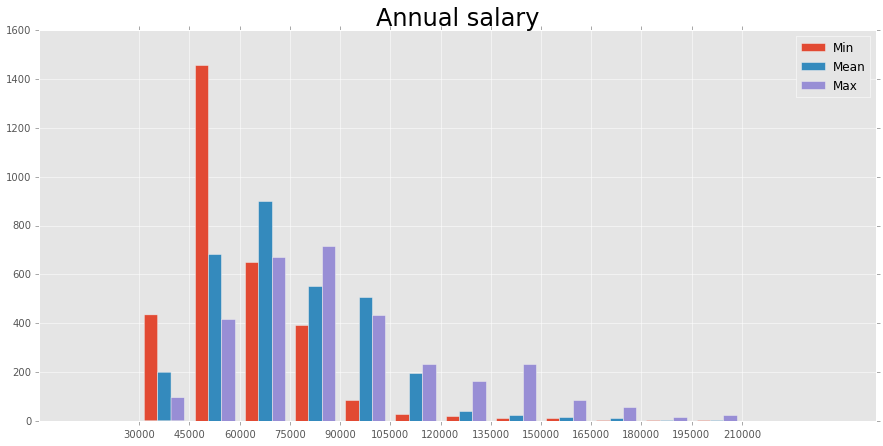

In [28]:
plot_all_in_one(annual_df, 15000, u'Annual salary')

<built-in function max>


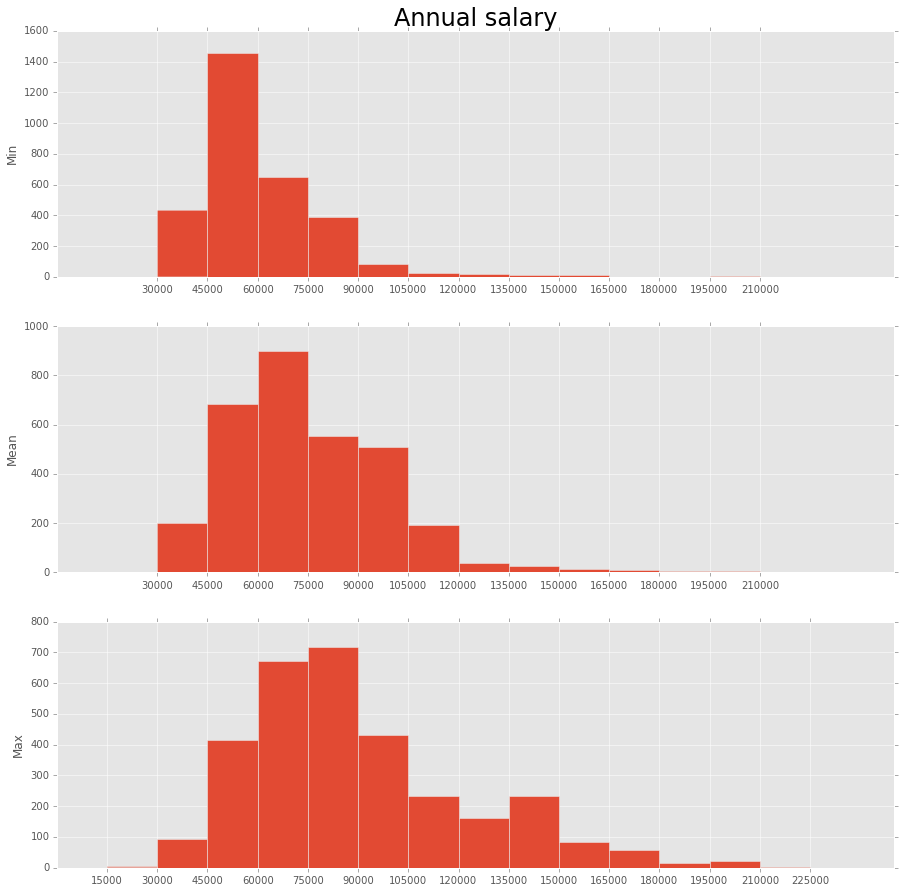

In [29]:
plot_salary_dist(annual_df, u'Annual salary', 15000, 250000)

## Hourly

In [30]:
hourly_df = data[(data.salary_frequency == HOURLY)]

In [31]:
hourly_df[['salary_range_from', 'salary_mean', 'salary_range_to']].describe()

,salary_range_from,salary_mean,salary_range_to
count,253.000000,253.000000,255.000000
mean,25.782609,28.604743,31.596078
std,17.063030,17.635583,18.624913
min,8.000000,9.000000,10.000000
25%,14.000000,15.000000,16.000000
50%,19.000000,23.500000,27.000000
75%,33.000000,35.500000,38.000000
max,71.000000,77.500000,87.000000


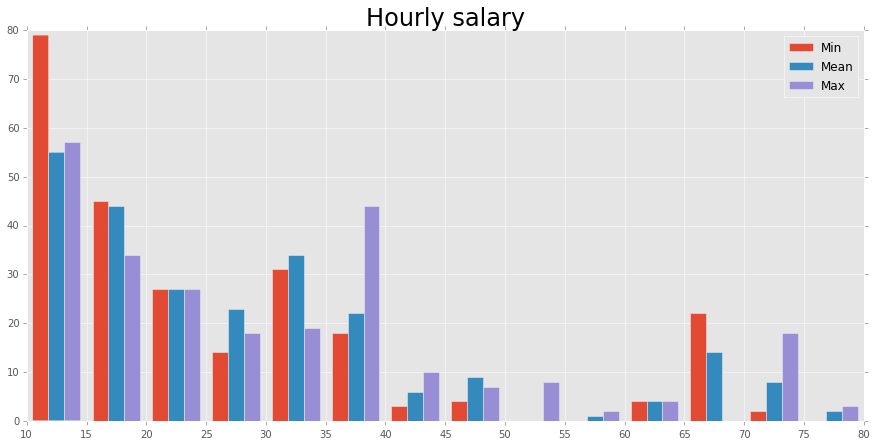

In [32]:
plot_all_in_one(hourly_df, 5, u'Hourly salary')

<built-in function max>


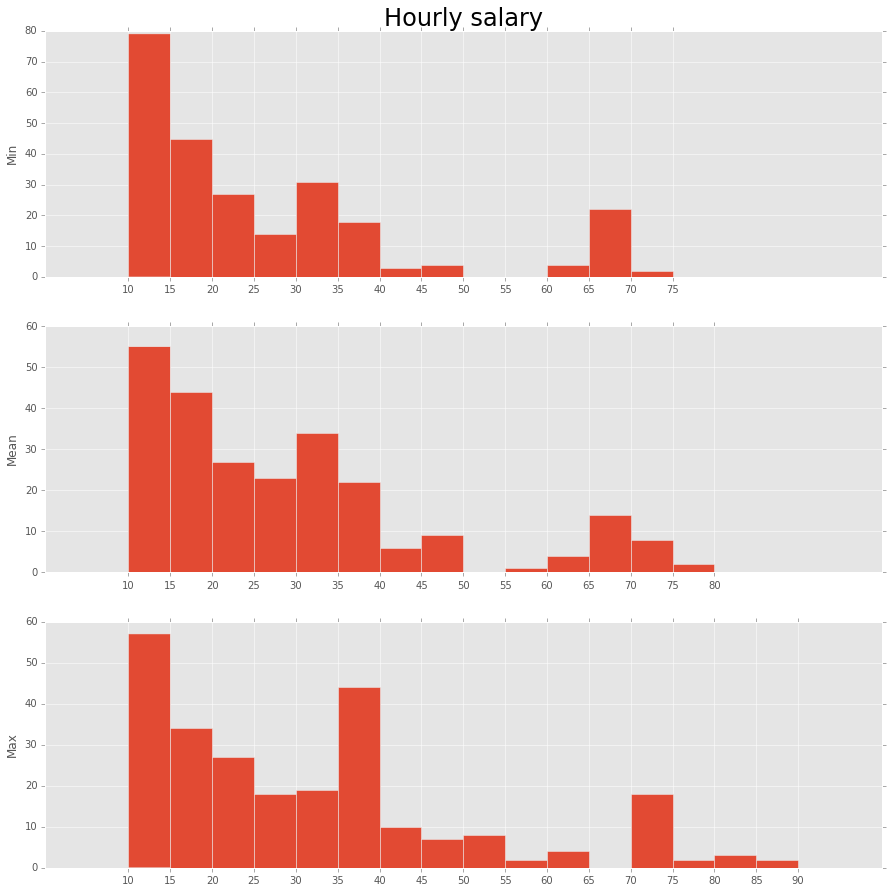

In [33]:
plot_salary_dist(hourly_df, u'Hourly salary', 5, 100)

## Daily Salary

In [34]:
daily_df = data[(data.salary_frequency == DAILY)]

In [35]:
daily_df[['salary_range_from', 'salary_mean', 'salary_range_to']].describe()

,salary_range_from,salary_mean,salary_range_to
count,28.000000,28.000000,28.000000
mean,305.357143,313.964286,322.571429
std,67.767147,63.283742,60.190702
min,198.000000,198.000000,198.000000
25%,251.000000,271.500000,292.000000
50%,298.500000,299.750000,310.000000
75%,356.000000,364.000000,364.000000
max,450.000000,450.000000,450.000000


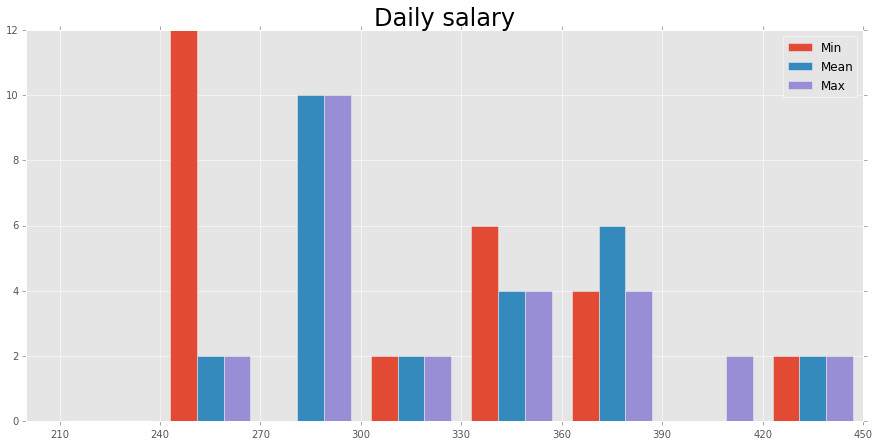

In [36]:
plot_all_in_one(daily_df, 30, u'Daily salary')

<built-in function max>


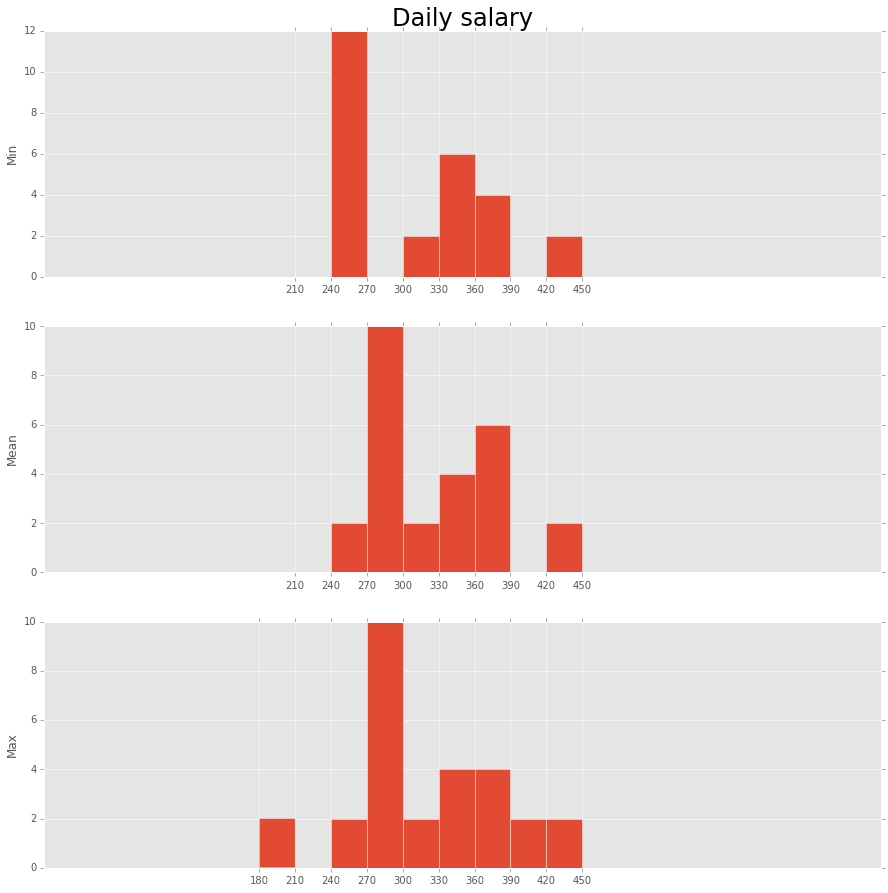

In [37]:
plot_salary_dist(daily_df, u'Daily salary', 30, 700)

## Забираем координаты с Google API

In [38]:
import time
import requests
import pymongo

DATABASE_URL = 'mongodb://myserver:27017/'

client = pymongo.MongoClient(DATABASE_URL)
shpere_db = client.shpere

In [ ]:
import sys

MAPS_URL = "http://maps.googleapis.com/maps/api/geocode/json"

def collect_geolocation(address_book):
    for i, address in enumerate(address_book):
        if not address:
            continue
            
        time.sleep(0.1)

        r = requests.get(MAPS_URL, {'address': address + ' New York',})
        
        sys.stdout.write('\r' + "%d getting %s" % (i + 1, address))
        sys.stdout.flush()
            
        yield address, r.json()

        
def get_georesults(address_book, collection):
    geo_collector = collect_geolocation(address_book)

    for address, result in geo_collector:
        result["_id"] = address
        try:
            collection.insert_one(result)
        except pymongo.errors.DuplicateKeyError:
            pass

get_georesults(data.work_location.fillna(False).unique(), shpere_db.work_location)
get_georesults(data.work_location_1.fillna(False).unique(), shpere_db.work_location_1)

## Рисуем карту зарплат

http://maps.googleapis.com/maps/api/geocode/xml?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA&key=YOUR_API_KEY


In [39]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [40]:
wl_geocodes_list = list(shpere_db.work_location.find({}))
wl_1_geocodes_list = list(shpere_db.work_location_1.find({}))

In [41]:
to_geocodes_dict = lambda geocodes: {geocode['_id']:geocode for geocode in geocodes}

In [42]:
wl_geocodes = to_geocodes_dict(wl_geocodes_list)
wl_1_geocodes = to_geocodes_dict(wl_1_geocodes_list)

In [43]:
def get_location(geocode):
    location = None

    results = geocode.get('results') if geocode else None
    if results:
        location = results[0].get('geometry').get('location')
    
    return location


def geocode_work_location(wl, wl_1):
    wl_geocode = wl_geocodes.get(wl)
    wl_1_geocode = wl_1_geocodes.get(wl_1)

    wl_geocode_loc = get_location(wl_geocode)
    wl_1_geocode_loc = get_location(wl_1_geocode)
    
    return (wl_geocode_loc.get('lng'), wl_geocode_loc.get('lat'))

In [44]:
to_location = lambda row: geocode_work_location(row['work_location'], row['work_location_1'])

In [48]:
data.location = data.apply(to_location, axis=1)

In [49]:
print data.location.value_counts()[:10]

(-73.9390123, 40.749463)     498
(-74.0059413, 40.7127837)    288
(-73.9360533, 40.7447957)    264
(-73.8644928, 40.7348133)    210
(-74.0035348, 40.7102606)    156
(-74.0060767, 40.7097597)    140
(-73.8926745, 40.7650078)    131
(-74.0056353, 40.7142188)    112
(-74.0024476, 40.7156297)    100
(-73.8634894, 40.7348796)     97
dtype: int64


In [50]:
p1, p2 = zip(*data.location.as_matrix())
data['lon'] = np.array(p1)
data['lat'] = np.array(p2)

In [51]:
data[['lon', 'lat', 'salary_range_from', 'salary_mean', 'salary_range_to']].head()

,lon,lat,salary_range_from,salary_mean,salary_range_to
0,-73.879382,40.886583,94983,94983,94983
1,-73.879382,40.886583,94983,94983,94983
2,-73.864493,40.734813,54740,100508,146276
3,-73.864493,40.734813,54740,100508,146276
4,-74.005941,40.712784,35,35,35


In [52]:
PATH_TO_SHAPEFILE = './new-york_new-york.imposm-shapefiles/new-york_new-york_osm_roads'

# coords = [-80.068359, 39.584524, -70.883789, 45.348285]
# coords = [-74.50099725584383, 40.344999987396676, -73.22600106986815, 41.09699978114807]

coords = [-74.128876, 40.520455, -73.618011, 40.958512]

w, h = coords[2] - coords[0], coords[3] - coords[1]
extra = 0.01
s = 0.01

map = Basemap(
    llcrnrlon=coords[0] - extra * w, # The lower left corner geographical longitude
    llcrnrlat=coords[1] - extra + s * h, # The lower left corner geographical latitude
    urcrnrlon=coords[2] + extra * w, # The upper right corner geographical longitude
    urcrnrlat=coords[3] + extra + s * h, # The upper right corner geographical latitude
    projection='lcc',
    lat_1=42.888040,
    lon_0=-75.717773,
    resolution='f'
)

In [53]:
x, y = map(data.lon.as_matrix(), data.lat.as_matrix()) 

sm = plt.cm.ScalarMappable(cmap=matplotlib.cm.cool, norm=plt.Normalize(vmin=0, vmax=110000))
sm.set_array([])

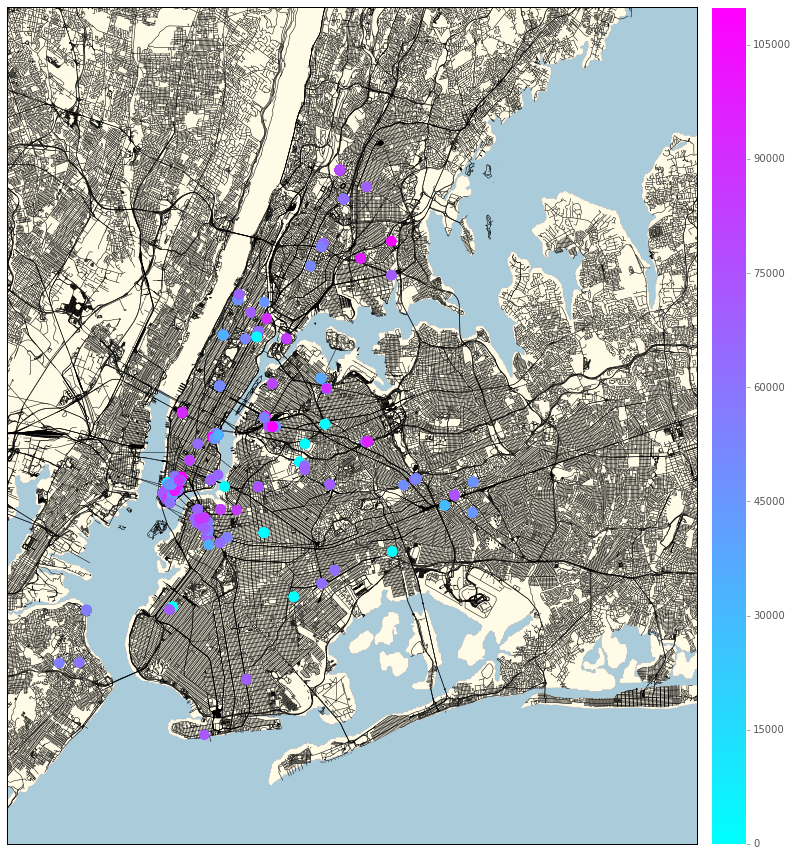

In [54]:
plt.figure(figsize=(15, 15))

map.readshapefile(PATH_TO_SHAPEFILE,
                  'cty036',
                  color='black',
                  zorder=1)

map.drawmapboundary(fill_color='#AACBD9')
map.fillcontinents(color='#FFFBE7', lake_color='#AACBD9', zorder=0)
map.drawcoastlines(color='#C3BCBC', zorder=0)

map.colorbar(sm)
map.scatter(x, y, 100, marker='o', color=sm.to_rgba(data.salary_mean.as_matrix()))